# Removing Noise from Images Using AutoEncoder

## Importing Libraries

In [16]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import (Input, Dense)
from IPython.display import Image, SVG
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

## Loading and Reading Dataset

In [47]:
#Reading Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Scaleing the training and test data ranging between 0 and 1.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
 
print(x_train.shape, ' Shape of Training Image Set')
print(x_test.shape, ' Shape of Testing Image Set')


(60000, 784)  Shape of Training Image Set
(10000, 784)  Shape of Testing Image Set


## Adding Noise to the Images

In [78]:
#Adding Noise to the Images(When noise Factor is 0.2)
noise_factor=0.8

x_train = x_train + np.random.randn(*x_train.shape) * noise_factor
x_train = x_train.clip(0.0, 1.0)

x_test = x_test + np.random.randn(*x_test.shape) * noise_factor
x_test = x_test.clip(0.0, 1.0)


In [79]:
batch_size = 128
epochs = 10
Channel = 1
input_unit=784
hidden_unit=32
output_unit=784
input_dim = x_train.shape[1]
input_img= Input(shape=(784,))

## Implementing Autoencoder

In [80]:
import warnings
warnings.filterwarnings('ignore')

encoded = Dense(units=hidden_unit, activation='relu')(input_img)
encoded = Dense(units=output_unit, activation='relu')(encoded)

autoencoder=Model(input_img, encoded)
autoencoder.summary()

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(x_train, x_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_37 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.0165 - acc: 0.4093 - val_loss: 0.9225 - val_acc: 0.4180
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.9197 - acc: 0.4199 - val_loss: 0.9176 - val_acc: 0.4223
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss:

## Plotting the images

When noise factor is 0.2


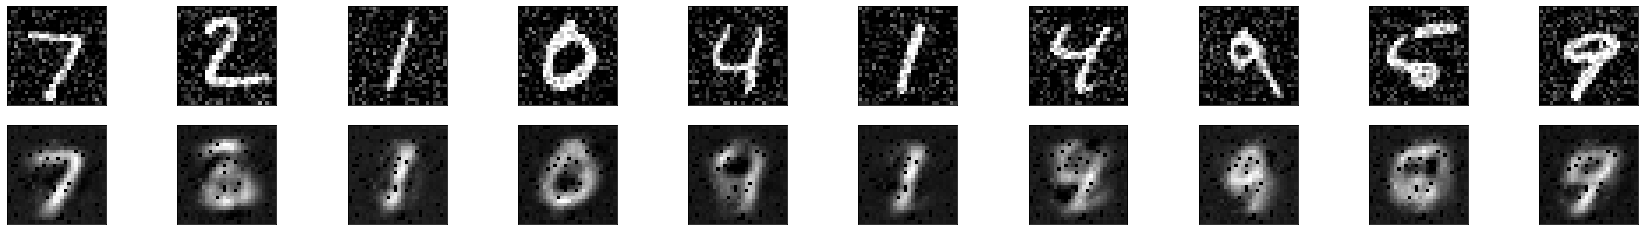

In [77]:
img_predicted = autoencoder.predict(x_test)
print("When noise factor is 0.2")
plt.figure(figsize=(30, 4))
for i in range(10):
    # noisy image
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
       
    #After using autoencoder
    ax = plt.subplot(2, 10, 10 +i+ 1)
    plt.imshow(img_predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()

When noise factor is 0.8


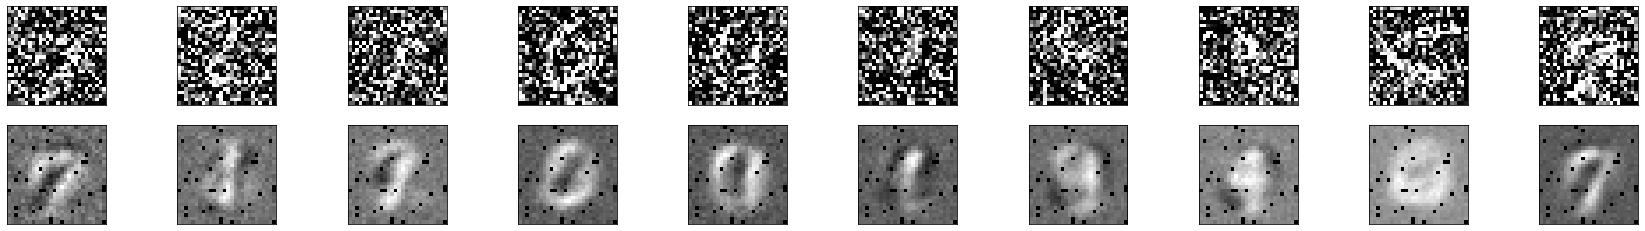

In [81]:
img_predicted = autoencoder.predict(x_test)
print("When noise factor is 0.8")
plt.figure(figsize=(30, 4))
for i in range(10):
    # noisy image
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
       
    #After using autoencoder
    ax = plt.subplot(2, 10, 10 +i+ 1)
    plt.imshow(img_predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()